# 1.5 Plotting ramblings of an astronomer
Hi all, in this extra notebook, I'll go over the way I like to approach plotting, and some of the tricks I have picked up over the years. There are multiple ways to plot things, so this will be based on my experiences. We're going to try to do everything with just `matplotlib` for now. Be aware however, there are wrapper packages out there, for example packages like [seaborn](https://seaborn.pydata.org/#) that can make pretty plots, and `pandas` (which we will look at in the next notebook) which is great for doing an analysis and plotting a data set.

In matplotlib, there are often two different commands that do essentially the same thing. This can be confusing at the start, and will just take practice and time to get used to. I'll try and point some of them out in the comments in the code to give you fair warning.

## What are you plotting *on*?
Ok, the most simple way to plot is like the below:

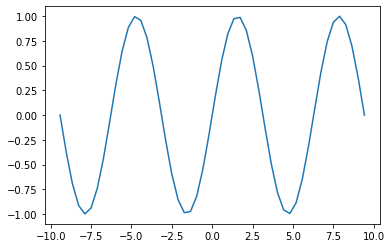

In [1]:
import numpy as np
import matplotlib.pyplot as plt

##Make a sine function to plot
x_values = np.linspace(-3*np.pi,3*np.pi,50)
sin_values = np.sin(x_values)

##do the plot
plt.plot(x_values, sin_values)

##as a jupyter notebook is based off of an
##interactive environment, in this example, you
##don't necessarily need to call plt.show().
##The notebook understands the type of output
##and displays it for you automagically
##If you write this code inside a script
##however, when you run 'python script.py',
##without plt.show(), you won't get anything
##to show up at all. You have been warned
plt.show()


> *Note: As I'm keeping this basic, I haven't added axes labels, but in the real world, ALWAYS ADD AXES LABELS, anyone else looking at this has no idea what you are plotting. If you add labels every time, it becomes habit, and the world is a better place.*

Right, so the `plt.plot` command is really doing *three* main things here:

1. It's making a `figure`, which is basically the canvas that everything is painted onto
2. It's also making an `axes`, which is drawn onto the `figure`, and the data is plotted on
3. It's plotting our sine data, with default settings, which is a line plot

I'm mentioning this, because if you want finer control, you can create these things explicitly:


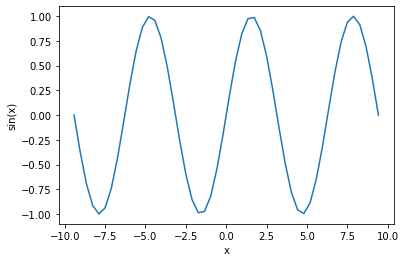

In [2]:
##This explicitly creates a figure, which we
##can then manually add multiple axes to if
##we want
fig = plt.figure()

##This is one example of how to add an axes
##the three numbers are how many axes along
##the x-axis, how many axes along the y-axes,
##which axes in that configuration we are
##adding. So this command just means add a
##single axes that covers the whole figure
ax = fig.add_subplot(1,1,1)

##Same as above command, but ax.plot,
##not plt.plot. Note that plt.plot will
##actually work, but plt.plot finds the 
##most RECENTLY created axes to plot on
##If you explicitly say ax.plot you 
##know where it's going to be plotting
ax.plot(x_values, sin_values)

##Add some labels to the ax
ax.set_xlabel('x')
ax.set_ylabel('sin(x)')

##you can alternatively run these commands
##to add labels. Note that, annoyingly, they
##are slightly different and don't have 'set_'
#plt.xlabel('x')
#plt.ylabel('sin(x)')

plt.show()


Often it's useful to create multiple axes on a single figure, so it's easier to compare what you are plotting, and keep track of things. My favourite way of doing that is by using `plt.subplots`. I'll also use these plots to introduce how you can control the linestyle, colours, and markers of the `plot` method

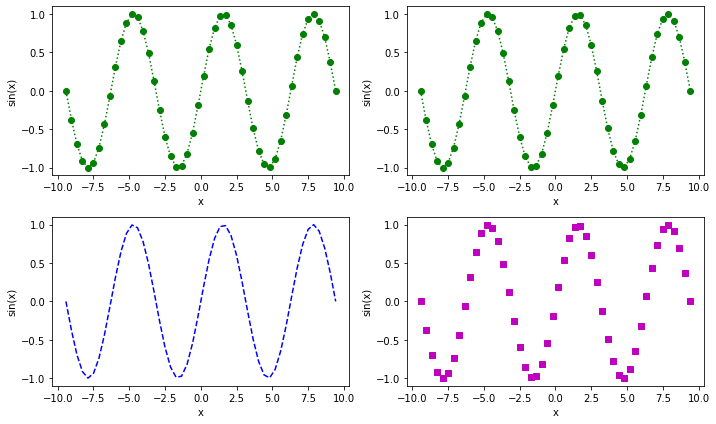

In [3]:
##This command creates a new figure, and
##returns an array of axes objects. The
##array position matches a grid of axes,
##so this command makes a 2 by 2 grid of
##4 subplots
##figsize controls the overall shape of
##your plot - here I make it 10 wide and 6 tall
##sadly, the units are inches

fig, axs = plt.subplots(2,2,figsize=(10,6))

##As we have an array of axes, we can access
##them like a normal 2D array, so 0,0 gives us top left
##In the plot command here, I use explicit keywords
##to change the colour of the plot, add a circle ('o') marker,
##and make the linestyle to be 'dotted'
axs[0,0].plot(x_values, sin_values,color='g',marker='o',linestyle='dotted')

##You can do exactly the same by passing the third
##argument as a string containing specific letters
##and symbols. Here we have:
##  g = green
##  o = circle marker
##  : = dotted line
axs[0,1].plot(x_values, sin_values,'go:')

##Do a blue dashed line
axs[1,0].plot(x_values, sin_values,'b--')

##If you don't pass a line formatter
##but do pass a marker formatter, you 
##don't get a line plotted
axs[1,1].plot(x_values, sin_values,'ms')

##This is a cheeky trick to label all your
##axes at once - the .flatten argument makes
##a 2D array into a 1D, so you can loop over it
for ax in axs.flatten():
    ax.set_xlabel('x')
    ax.set_ylabel('sin(x)')

##This somewhat magic command makes the axes labels
##and tickmarks not overlap
plt.tight_layout()

##Have a look
plt.show()



## <font color='blue'>Exercise 1.5.1</font>

Go to the Notes section of this page [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html?highlight=plot#matplotlib.pyplot.plot) to find out all of the shortcuts for colours, markers, and linestyles. Make a 3 by 2 set of axes (so 6 axes in total), and plot $\sin(x)$ vs $x$ without repeated a marker, a colour, or a linestyle

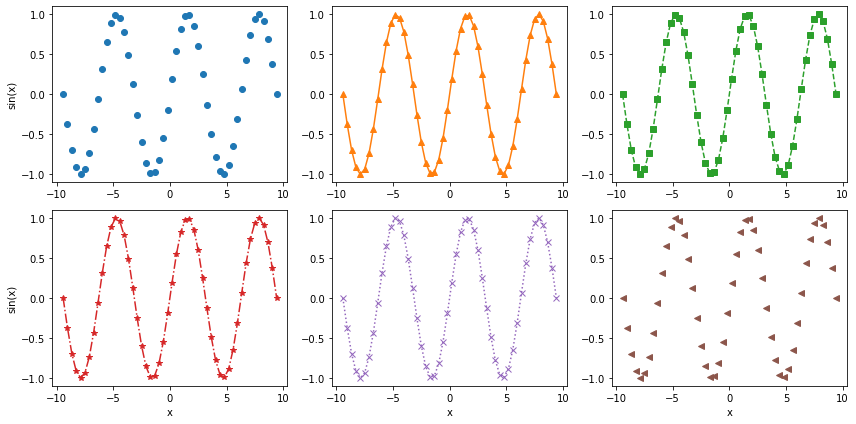

In [4]:
fig, axs = plt.subplots(2,3,figsize=(12,6))

##The default matplotlib colours are labelled
##with C and numbered from 0 to 9
axs[0,0].plot(x_values, sin_values,'C0o')
axs[0,1].plot(x_values, sin_values,'C1^-')
axs[0,2].plot(x_values, sin_values,'C2s--')
axs[1,0].plot(x_values, sin_values,'C3*-.')
axs[1,1].plot(x_values, sin_values,'C4x:')
axs[1,2].plot(x_values, sin_values,'C5<')

##Techincally, we don't need to label every axis
##We can do slices on the axs array to label
##the minimum number of axis

##Set y label for two plots on left:
for ax in axs[:,0]:
    ax.set_ylabel('sin(x)')
    
##Set x label for bottom row:
for ax in axs[1,:]:
    ax.set_xlabel('x')

##This somewhat magic command makes the axes labels
##and tickmarks not overlap
plt.tight_layout()

##Have a look
plt.show()

## Logs and errors
Right, previously I've shown that a classic syncrotron spectra follows a power law like $S = S_0\nu^\alpha$. Plotting this over a large range of frequencies isn't too informative as the behaviour gets lost due to the scaling of the exponential against the axis units. Instead, it's better to plot it with a logarithmic axis. Let's see how, and look at the difference:

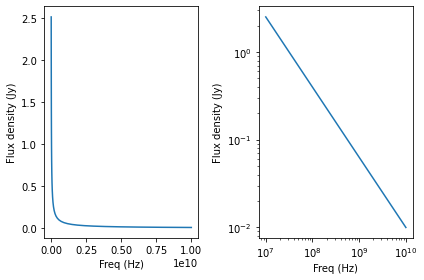

In [5]:
##Make some data

##np.logspace evenly samples data in log space
##below it will sample between 10**7 and 10**10
##and give me 100 samples
freqs = np.logspace(7, 10, 30)
sed = 1e+6*freqs**-0.8

##This time we only ask for 1
##row of plots, so axs comes
##back as a 1D array
fig, axs = plt.subplots(1,2)

##Plot a linear scale plot
axs[0].plot(freqs,sed)

##Here we set both axis to be
##a log scale
axs[1].set_xscale('log')
axs[1].set_yscale('log')

##We don't have to change our data,
##just the scale of the axis
axs[1].plot(freqs,sed)

for ax in axs:
    ax.set_xlabel('Freq (Hz)')
    ax.set_ylabel('Flux density (Jy)')
    

plt.tight_layout()
plt.show()


On the right, we can see the data follow a classic power-law, as it's a flat line on a log-plot. If we saw curvature, we could intuitively see that some different physics is happening; by eye you just can't see that on the left. Choosing the correct thing to plot is important.

Ok, what about errors? How do we add error bars to our plots?

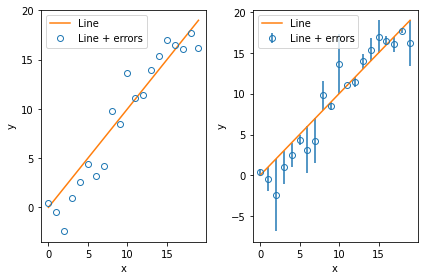

In [6]:
##We seen this before, I'll just make a line,
##add some noise, and then plot some error bars

x_values = np.arange(0,20)
errors = np.random.normal(0,2,20)

y_values = x_values + errors

fig, axs = plt.subplots(1,2)

##This time I'm going to add a legend. To do
##that, I use the label keyword, which gets
##used later
axs[0].plot(x_values, x_values,'C1-',label='Line')
axs[1].plot(x_values, x_values,'C1-',label='Line')

##I always find it clearer to plot empty markers,
##which means you can see data below them. To do that,
##I include set the marker face colour to none (mfc='none')
axs[0].plot(x_values, y_values,'C0o',label='Line + errors',mfc='none')


##Plot it with errorbars, using .errorbar, and setting yerr=error
##Note with the errorbar command, you can't supply the 'C0o' string
##You have to specify the keywords individually

axs[1].errorbar(x_values, y_values, yerr=errors, label='Line + errors', linestyle='none',marker='o',color='C0',mfc='none')


for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ##Add a legend to both axes. You can add
    ##legends by just doing plt.legend, but you have
    ##to call plt.legend in exactly the right point of
    ##the code, when each axes is 'current'. I prefer
    ##this way because I can know for sure axes I am
    ##adding a legend to
    ax.legend()
    
    
plt.tight_layout()
plt.show()

## <font color='blue'>Exercise 1.5.2</font>
Add some errors to the `sed` array we created before, and plot error bars in both a linear axes and logarithmic axes. Use `np.random.normal` to add errors, with `std=5e-2`.
> *I will note however that this is totally unrealistic for an SED - the sensitivity of telescopes changes drastically over these frequency ranges, so the errors wouldn't follow the normal distribution*

0.6575012160366909


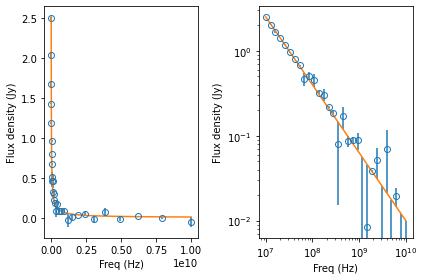

In [7]:
##Make some data
freqs = np.logspace(7, 10, 30)
sed = 1e+6*freqs**-0.8

print(np.std(sed))

errors = np.random.normal(0,5e-2,30)

##This time we only ask for 1
##row of plots, so axs comes
##back as a 1D array
fig, axs = plt.subplots(1,2)

##Plot a linear scale plot
axs[0].plot(freqs,sed,'C1-',label='SED')
axs[0].errorbar(freqs,sed + errors, yerr=errors, label='SED + errors', linestyle='none',marker='o',color='C0',mfc='none')

##Here we set both axis to be
##a log scale
axs[1].set_xscale('log')
axs[1].set_yscale('log')

##We don't have to change our data,
##just the scale of the axis
axs[1].plot(freqs,sed,'C1-',label='SED')

axs[1].errorbar(freqs,sed + errors, yerr=errors, label='SED + errors', linestyle='none',marker='o',color='C0',mfc='none')

for ax in axs:
    ax.set_xlabel('Freq (Hz)')
    ax.set_ylabel('Flux density (Jy)')
    

plt.tight_layout()
plt.show()

## Polar plots
The cartesian coordinate system ($x, y$) isn't the only thing out there, and often calculations are far easier in another system. Let use a circle as an example, and plot a circle on a cartesian and polar coordinates (see [here](https://mathworld.wolfram.com/PolarCoordinates.html) if you are unfamiliar with polar coordinates). In astronomy, observer coordintes known as *azimuth, elevation* are polar, and help you locate things on the sky, so this crops up every now and then.

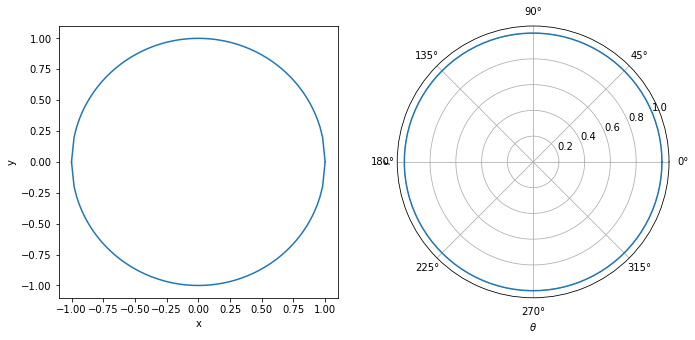

In [8]:
fig = plt.figure(figsize=(11,5))

##We're going to set up axes in a
##different way, as you can't change
##the projection of a plot after the fact

##Make a normal cartesian axes in one row,
##2 column plot, in the first position (left)
ax1 = fig.add_subplot(1,2,1)

##Make another plot but in a polar projection,
##and on the right-hand side (the final two)
ax2 = fig.add_subplot(1,2,2,projection='polar')

##make a circle in cartesian coords
##x**2 + y**2 = r**2

r = 1
x = np.linspace(-r,r,100)
y = np.sqrt(r**2 - x**2)

##Plot both positive and negative answers
ax1.plot(x,y,'C0-')
ax1.plot(x,-y,'C0-')

##labels labels labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')


##same radius circle in polar coords
theta = np.linspace(0,2*np.pi,100)

##the np.ones function creates an array
##of one to the given length
radius = np.ones(100)*r

##The plot function works the same way, but
##now your 'x' is the theta angle (in radians)
##and 'y' is a radius
ax2.plot(theta,radius,'C0-')

##labels labels labels
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel('$r$')

#plt.tight_layout()
plt.show()


## <font color='blue'>Exercise 1.5.3</font>
Make two axes, one with cartesian, and one with polar coordinates. Turn my cartesian circle maths and plotting into a function that takes an `axes`, a radius `r` and a `color`, and plots a cirle of radius `r` on the `axes` in the given `color`. Using this, plot 5 circles with different radii on the cartesian plot, and an equivalent 5 circles on the polar plot. Plot the circles that have the same radius in the same colour on both axes.

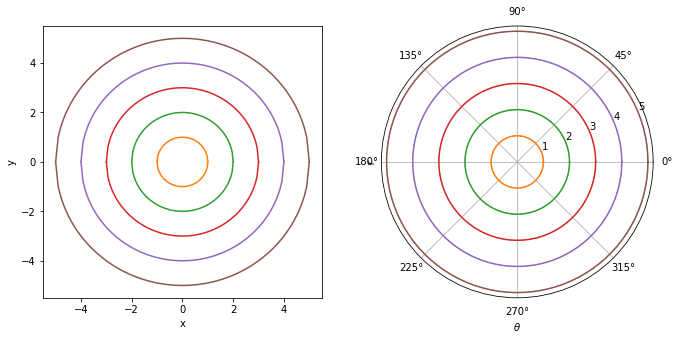

In [9]:
##Don't forget your documentation strings!
def plot_circle_on_cartesian(ax, r, color ):
    """Args:
            ax: matplotlib axes
            radius: radius of circle
            color: colour of circle to plot
    
    Plots a circle of color and radius r on a cartesian
    axes """

    ##Cartesian maths
    x = np.linspace(-r,r,100)
    y = np.sqrt(r**2 - x**2)

    ##Plot both positive and negative answers
    ax.plot(x,y,color=color)
    ax.plot(x,-y,color=color)
    

##Set up figure and axes
fig = plt.figure(figsize=(11,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2,projection='polar')


##full 2pi of a circle
theta = np.linspace(0,2*np.pi,100)

for radius in np.arange(1,6):
    ##This makes a string containing the
    ##radius that we can use as a colour - 
    ##e.g. if radius = 1, colour='C1'
    colour = 'C{:d}'.format(radius)
    plot_circle_on_cartesian(ax1, radius, colour)
    
    ##Plot the same radius circle on ax2
    ##I'm annoying and British so I spell the word
    ##as colour, but the keyword is color
    ax2.plot(theta, np.ones(100)*radius, color=colour)
    
    
##labels labels labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')


##labels labels labels
##ok this r'$\theta$' has a r at the front
##this means a "raw" string, which I've needed
##because I'm using LaTeX to create a theta symbol
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel('$r$')
    
plt.show()

## Histograms and KDEs
Let's say you have many samples of data, and don't know what the underlying physics behind the distribution is. A good starting point is the histogram the data, and see if you can see some kind of recognisable distribution, to try and infer some physics. Here we'll make some fake data, and look at histogramming it. The choice of bin-width can influence what we see, so we'll try and few different bin-widths:

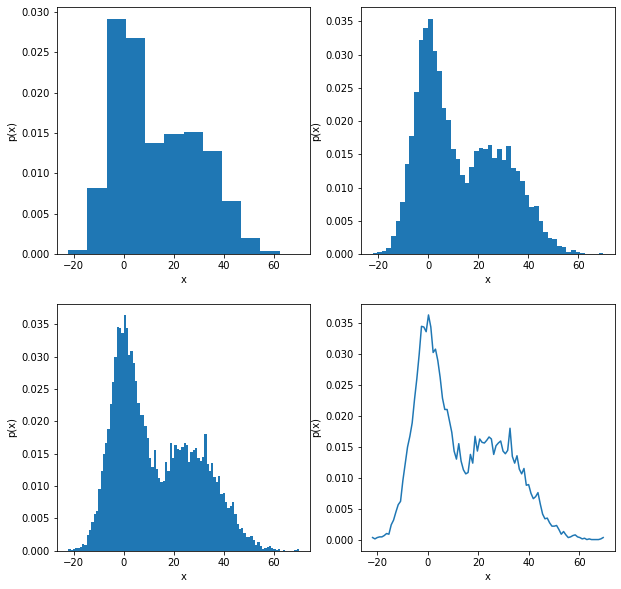

In [12]:
##numpy random is supposed to be random
##so if you call this function multiple times,
##you get a different set of samples. I want
##you to get the same set of random values I get,
##which I can do by setting the random 'seed'
##like this
np.random.seed(983745)

##I'm going to make some data by combining two normal distributions
data1 = np.random.normal(0,6,5000)
data2 = 2*np.random.normal(13,6,5000)

##I'm going to use np.append, which
##append one array into another to combine
##the data
data = np.append(data1, data2)

#Set up a few plots
fig, axs = plt.subplots(2,2,figsize=(10,10))

##The second argument of ax.hist is the number of bins
##ax.hist will automatically use the highest and lowest
##values of your data to set the bin range
##density means we set the sum of the histogram to 1.0

axs[0,0].hist(data,12,density=True)
axs[0,1].hist(data,50,density=True)

##ax.hist actually returns the binned data, the bins,
##and the patch (the thing that was plotted) if you want
##to use the values for something else
hist_data, bins, _, = axs[1,0].hist(data,100,density=True)

##However, hist returns the bin EDGES, so there are
##one more bin values that histogrammed data points
##if you want to plot the values at bin centre on another
##plot, you need to do something like the below

bin_centres = (bins[:-1] + bins[1:]) / 2

axs[1,1].plot(bin_centres, hist_data, 'C0-')

for ax in axs.flatten():
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')

plt.show()



Ok, so when we chose a low number of bins, we lost detail - but how do we pick the correct bin width? At some point if we have noisy data, we might just get rubbish back. The real full answer is "it depends on your science and data", but there is an alternative to a histogram. Something called a "kernel density estimator" or KDE (you can read more [here](https://en.wikipedia.org/wiki/Kernel_density_estimation) as an introduction, and [here](https://towardsdatascience.com/histograms-vs-kdes-explained-ed62e7753f12) for a data science take). In short, instead of doing a simple binning, you use some kind of kernel function (such as a Gaussian) to smooth the data, and reveal the underlying distribution. Here is an example using `scipy`:

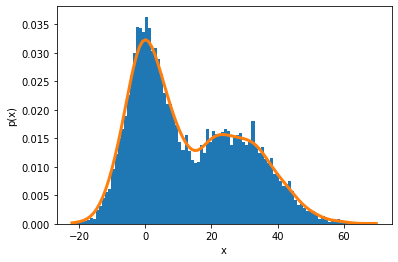

In [14]:
from scipy.stats import gaussian_kde

##Sets up a kernel density estimator for this data
kde = gaussian_kde(data)

##A range of values we want to estimate our
##distribution at - here I just sample between
##the maxiumum and minimum values
est_values = np.linspace(min(data),max(data),100)

##Use the kde object to estimate at our values
kde_est = kde.evaluate(est_values)

##plt a histogram for comparison
plt.hist(data,100,density=True)

##plt the kde estimate
plt.plot(est_values,kde_est,'C1-',linewidth=3.0)

plt.xlabel('x')
plt.ylabel('p(x)')

plt.show()

Alright, so our KDE estimation has picked out the same amount of detail as our 100 bins histogram. Now, I told my kernel estimator to use 100 points, so really I tweaked it the same amount my histogram. One of the major differences though is that our KDE is smooth; if you have groups of outliers, or just very noisy data, sometimes that smoothing can reveal the distribution better.

## <font color='blue'>Exercise 1.5.4</font>
Make 4 plots in a 2 by 2 arrangement, where you plot a histogram and KDE of the `data` on each axes. For each axes, change the number of bins in the histogram, and the number of values you estimate you KDE at.

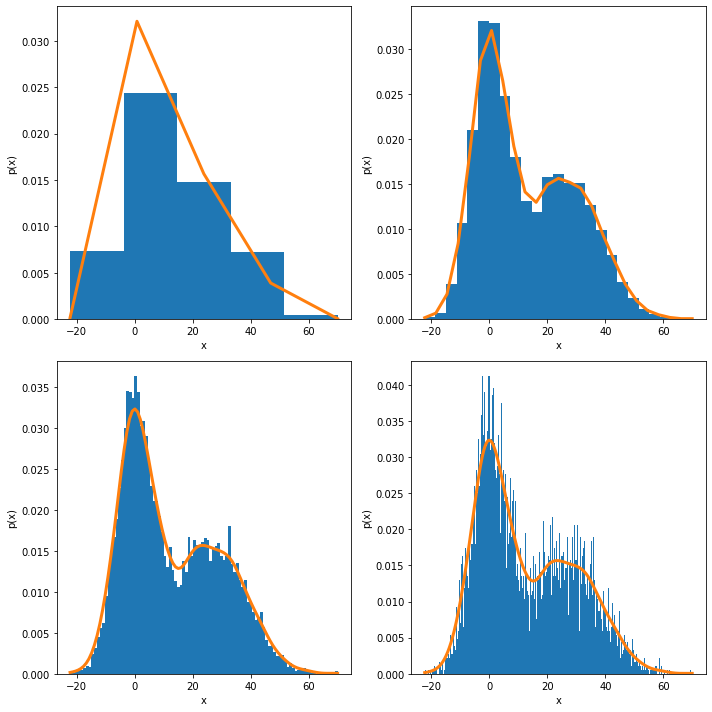

In [23]:
def do_plot(ax, data, kde, bins):
    """Take an axis (ax) and plot a histogram and KDE
    (using kde) of the data (data) with the given number
    of bins (bins)"""

    ##A range of values we want to estimate our
    ##distribution at - here I just sample between
    ##the maxiumum and minimum values
    est_values = np.linspace(min(data),max(data),bins)

    ##Use the kde object to estimate at our values
    kde_est = kde.evaluate(est_values)

    ##plt a histogram for comparison
    ax.hist(data,bins,density=True)

    ##plt the kde estimate
    ax.plot(est_values,kde_est,'C1-',linewidth=3.0)
    
    ax.set_xlabel('x')
    ax.set_ylabel('p(x)')


##Sets up a kernel density estimator for this data
kde = gaussian_kde(data)

fig, axs = plt.subplots(2,2,figsize=(10,10))

##Set a number of bins to use
bin_values = [5,25,100,500]

##zip them and input in the do_plot function
for bins, ax in zip(bin_values,axs.flatten()):
    do_plot(ax, data, kde, bins)

plt.tight_layout()
plt.show()